In [7]:
import pandas as pd
from pandas import merge

from numpy import arange
from matplotlib import pyplot
%matplotlib inline

import plotly
from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

pd.options.display.max_columns = 50





In [8]:
cands = pd.read_csv("pe16rwvd9.csv", index_col = "fips", encoding = "latin-1")
cands.head()

county  st  total_votes             lead state.name  \
fips                                                                    
10001        Kent County  DE        74253     Donald Trump   Delaware   
10003  New Castle County  DE       261468  Hillary Clinton   Delaware   
10005      Sussex County  DE       105814     Donald Trump   Delaware   
1001      Autauga County  AL        24661     Donald Trump    Alabama   
1003      Baldwin County  AL        94090     Donald Trump    Alabama   

       Donald.Trump  Hillary.Clinton Candidates  Votes  
fips                                                    
10001         36989            33347      other      0  
10003         85507           162905      other      0  
10005         62607            39329      other      0  
1001          18110             5908      other      0  
1003          72780            18409      other      0

In [9]:
cands.shape

(3111, 9)

In [10]:
cands = cands[["county", 'lead', 'st', "state.name", 'total_votes',  'Donald.Trump', 'Hillary.Clinton',
        'Votes', 'Candidates']]
cands.head()

county             lead  st state.name  total_votes  \
fips                                                                    
10001        Kent County     Donald Trump  DE   Delaware        74253   
10003  New Castle County  Hillary Clinton  DE   Delaware       261468   
10005      Sussex County     Donald Trump  DE   Delaware       105814   
1001      Autauga County     Donald Trump  AL    Alabama        24661   
1003      Baldwin County     Donald Trump  AL    Alabama        94090   

       Donald.Trump  Hillary.Clinton  Votes Candidates  
fips                                                    
10001         36989            33347      0      other  
10003         85507           162905      0      other  
10005         62607            39329      0      other  
1001          18110             5908      0      other  
1003          72780            18409      0      other

In [11]:
cols = cands.columns[5:7]
cols

Index(['Donald.Trump', 'Hillary.Clinton'], dtype='object')

In [12]:
cluster = KMeans(n_clusters=7)

In [13]:
# Cluster prediction for each player
cands["cluster"] = cluster.fit_predict(cands[cands.columns[5:6]])
cands.head()

county             lead  st state.name  total_votes  \
fips                                                                    
10001        Kent County     Donald Trump  DE   Delaware        74253   
10003  New Castle County  Hillary Clinton  DE   Delaware       261468   
10005      Sussex County     Donald Trump  DE   Delaware       105814   
1001      Autauga County     Donald Trump  AL    Alabama        24661   
1003      Baldwin County     Donald Trump  AL    Alabama        94090   

       Donald.Trump  Hillary.Clinton  Votes Candidates  cluster  
fips                                                             
10001         36989            33347      0      other        2  
10003         85507           162905      0      other        6  
10005         62607            39329      0      other        2  
1001          18110             5908      0      other        0  
1003          72780            18409      0      other        2

In [14]:
#Assigning each player to specific seed point: making it possible to plot on 2d scatterplot
pca = PCA(n_components = 2)
cands['x'] = pca.fit_transform(cands[cols])[:,0]
cands['y'] = pca.fit_transform(cands[cols])[:,1]
cands = cands.reset_index()

In [15]:
cand_clusters = cands[["fips", "cluster", "x", "y"]]
cand_clusters.head()

fips  cluster              x             y
0  10001        2   19702.694392  -9463.840435
1  10003        6  157186.040474   5950.478825
2  10005        2   36637.567872 -29595.315995
3   1001        0  -13310.972307  -5057.802185
4   1003        2   22592.684281 -48139.252306

In [16]:
#Combining the player cluster table with the original stats table
final = merge(cands, cand_clusters)
final.head()

fips             county             lead  st state.name  total_votes  \
0  10001        Kent County     Donald Trump  DE   Delaware        74253   
1  10003  New Castle County  Hillary Clinton  DE   Delaware       261468   
2  10005      Sussex County     Donald Trump  DE   Delaware       105814   
3   1001     Autauga County     Donald Trump  AL    Alabama        24661   
4   1003     Baldwin County     Donald Trump  AL    Alabama        94090   

   Donald.Trump  Hillary.Clinton  Votes Candidates  cluster              x  \
0         36989            33347      0      other        2   19702.694392   
1         85507           162905      0      other        6  157186.040474   
2         62607            39329      0      other        2   36637.567872   
3         18110             5908      0      other        0  -13310.972307   
4         72780            18409      0      other        2   22592.684281   

              y  
0  -9463.840435  
1   5950.478825  
2 -29595.315995  
3  -5057.802185  
4 -48139.252306

In [17]:
trace0 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==0]["x"],
                    y = cand_clusters[cand_clusters.cluster ==0]["y"],
                    name = "Cluster 1", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(0,0,255, 0.6)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace1 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==1]["x"],
                    y = cand_clusters[cand_clusters.cluster ==1]["y"],
                    name = "Cluster 2", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(rgba(255,255,0, 1.0)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace2 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==2]["x"],
                    y = cand_clusters[cand_clusters.cluster ==2]["y"],
                    name = "Cluster 3", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(171,217,233, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace3 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==3]["x"],
                    y = cand_clusters[cand_clusters.cluster ==3]["y"],
                    name = "Cluster 4", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(49,54,149, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace4 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==4]["x"],
                    y = cand_clusters[cand_clusters.cluster ==4]["y"],
                    name = "Cluster 5", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgbargb(255,0,0, 0.7)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace5 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==5]["x"],
                    y = cand_clusters[cand_clusters.cluster ==5]["y"],
                    name = "Cluster 6", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(255,0,255, 0.6)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace6 = go.Scatter(x = cand_clusters[cand_clusters.cluster ==6]["x"],
                    y = cand_clusters[cand_clusters.cluster ==6]["y"],
                    name = "Cluster 7", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(0.54,0.77,0.56, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )

In [18]:
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
iplot(data)

In [19]:
final["cluster"].value_counts()

4    2109
0     597
2     239
6      95
5      48
1      18
3       5
Name: cluster, dtype: int64

In [20]:
final[final.cluster ==0]["county"].head()

3     Autauga County
7      Blount County
10    Calhoun County
13    Chilton County
18     Coffee County
Name: county, dtype: object

In [21]:
final[final.cluster ==0].describe().loc[['mean', 'min', 'max']]

fips    total_votes  Donald.Trump  Hillary.Clinton       Votes  \
mean  31987.38861   39046.221106   21246.80067     15884.855946    5.492462   
min    1001.00000   15818.000000   13087.00000      1324.000000    0.000000   
max   56025.00000  365295.000000   36495.00000    318403.000000  909.000000   

      cluster              x              y  
mean      0.0   -2995.264698   -3336.363968  
min       0.0  -18723.003598  -19092.562420  
max       0.0  272691.382625  124328.838475

In [22]:
final[final.cluster ==1]["county"].head()

76          Broward County
98     Hillsborough County
113      Miami-Dade County
120      Palm Beach County
122        Pinellas County
Name: county, dtype: object

In [23]:
final[final.cluster ==1].describe().loc[['mean', 'min', 'max']]

fips   total_votes   Donald.Trump  Hillary.Clinton  \
mean  24872.277778  6.850189e+05  282732.222222    375082.444444   
min    6065.000000  4.187730e+05  224589.000000    176238.000000   
max   48439.000000  1.011651e+06  386807.000000    623006.000000   

             Votes  cluster              x              y  
mean    970.055556      1.0  435675.224500  -73804.336654  
min       0.000000      1.0  232058.551713 -169365.954997  
max   17461.000000      1.0  679784.970648   38834.774357

In [24]:
final[final.cluster ==2]["county"].head()

0        Kent County
2      Sussex County
4     Baldwin County
55     Morgan County
62     Shelby County
Name: county, dtype: object

In [25]:
final[final.cluster ==2].describe().loc[['mean', 'min', 'max']]

fips   total_votes  Donald.Trump  Hillary.Clinton  Votes  \
mean  30351.991632  110525.34728   52418.65272     52451.970711    0.0   
min    1003.000000   48753.00000   36814.00000      6950.000000    0.0   
max   55139.000000  591368.00000   76101.00000    515481.000000    0.0   

      cluster              x              y  
mean      2.0   43723.824426  -14568.681354  
min       2.0   -1161.385516  -48139.252306  
max       2.0  459502.344123  189310.124079

In [26]:
final[final.cluster ==3]["county"].head()

360            Cook County
1953       Maricopa County
2387         Harris County
2999    Los Angeles County
3010         Orange County
Name: county, dtype: object

In [27]:
final[final.cluster ==3].describe().loc[['mean', 'min', 'max']]

fips  total_votes  Donald.Trump  Hillary.Clinton  Votes  cluster  \
mean  16268.2    1660844.8      533718.4        1046881.4    0.0      3.0   
min    4013.0    1092116.0      440213.0         549040.0    0.0      3.0   
max   48201.0    2652072.0      620285.0        1893770.0    0.0      3.0   

                 x              y  
mean  1.148300e+06    6654.158235  
min   6.834781e+05 -269393.867341  
max   1.942572e+06  312997.488396

In [28]:
final[final.cluster ==4]["county"].head()

5      Barbour County
6         Bibb County
8      Bullock County
9       Butler County
11    Chambers County
Name: county, dtype: object

In [29]:
final[final.cluster ==4].describe().loc[['mean', 'min', 'max']]

fips    total_votes  Donald.Trump  Hillary.Clinton       Votes  \
mean  30554.916074    8171.917971   5027.675202      2759.684685    0.487435   
min    1005.000000      64.000000     57.000000         4.000000    0.000000   
max   56045.000000  280272.000000  13084.000000    260223.000000  331.000000   

      cluster              x              y  
mean      4.0  -22042.446916    5180.384306  
min       4.0  -26750.394979   -1939.837386  
max       4.0  210461.820884  115958.107931

In [30]:
final[final.cluster ==5]["county"].head()

75     Brevard County
85       Duval County
105        Lee County
118     Orange County
121      Pasco County
Name: county, dtype: object

In [31]:
final[final.cluster ==5].describe().loc[['mean', 'min', 'max']]

fips  total_votes   Donald.Trump  Hillary.Clinton  Votes  \
mean  27968.791667   410368.875  163127.229167    227641.270833    0.0   
min    4019.000000   203083.000  133653.000000     45744.000000    0.0   
max   55133.000000   910823.000  216163.000000    657149.000000    0.0   

      cluster              x              y  
mean      5.0  250054.936015  -33937.526619  
min       5.0   82019.237111 -106928.026083  
max       5.0  648688.922886  158743.183905

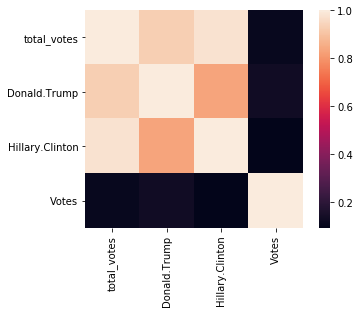

In [32]:
import seaborn as sns
candcor = cands[["county", 'lead', 'st', 'total_votes',  'Donald.Trump', 'Hillary.Clinton','Candidates', 'Votes']] #Subsetting the data
cor = candcor.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map
